# Method of averaging

Find solution fo a 2nd order system with damping using method if averaging. The common equation in unitless form:

$$\ddot{x}+\frac{1}{Q}\dot{x}+x=a\cos{\Omega t}$$

Since the equation corresponds to a non-free vibration, consider the solution in general form:

\begin{aligned}
x&=r\cos(\Omega t + \phi) \\
 &=r\cos\phi\cdot\cos\Omega t-r\sin\phi\cdot\sin\Omega t \\
 &=u\cos\Omega t + v\sin\Omega t
\end{aligned}

where $u$ and $v$ are slowly varying in time finctions in comparioson with $\cos\Omega t$, such that

$$\dot{u}\cos\Omega t + \dot{v}\sin\Omega t = 0$$

Accounting for that, derivatives
\begin{align}
\dot{x}&=\Omega (-u\sin\Omega t+ v\cos\Omega t) \\
\ddot{x}&=\Omega(-\dot{u}\sin\Omega t +\dot{v}\cos\Omega t) -\Omega^2x
\end{align}

Substituting them to the main equation

\begin{equation}
\begin{pmatrix}
\cos\Omega t & \sin\Omega t \\
-\sin\Omega t & \cos\Omega t
\end{pmatrix}
\begin{pmatrix}
\dot{u} \\ \dot{v}
\end{pmatrix}=
\begin{pmatrix}
0 \\ F(t,x,\dot{x})
\end{pmatrix}
\end{equation}

where

$$F(t,x,\dot{x})=-\frac{1-\Omega^2}{\Omega}x-\frac{1}{Q\Omega}\dot{x}+\frac{a}{\Omega}\cos\Omega t$$

Finaly, get rid of the trigonometry by averaging $\dot{u}$ and $\dot{v}$ over period

\begin{aligned}
\dot{u}&\approx-\frac{1}{T}\int_0^T F(t,x,\dot{x}) \sin(\Omega t)dt \\
\dot{v}&\approx\frac{1}{T}\int_0^T F(t,x,\dot{x})\cos(\Omega t) dt
\end{aligned}

In [142]:
import sympy as sp

In [143]:
a, W, Q, t, u, v = sp.symbols('a, \Omega, Q, t, u, v')

In [144]:
x  =      u * sp.cos(W*t) +     v * sp.sin(W*t)
dx = -W * u * sp.sin(W*t) + W * v * sp.cos(W*t)

In [145]:
F = -(1-W**2)/W * x - 1/Q/W * dx + a/W*sp.cos(W*t)
sp.collect(F.expand(),(sp.cos(W*t), sp.sin(W*t)))

(\Omega*v - v/\Omega + u/Q)*sin(\Omega*t) + (\Omega*u + a/\Omega - u/\Omega - v/Q)*cos(\Omega*t)

In [146]:
T = 2*sp.pi / W

In [147]:
du = (sp.integrate(-sp.sin(W*t)*F, (t,0,T))/T).expand()
du

-\Omega*v/2 + v/(2*\Omega) - u/(2*Q)

In [148]:
dv = (sp.integrate(sp.cos(W*t)*F, (t,0,T))/T).expand()
dv

\Omega*u/2 + a/(2*\Omega) - u/(2*\Omega) - v/(2*Q)

Amplitude-frequency responce, for instance, can be obtained from the stationary solutiton:

In [149]:
sol = sp.solve((du,dv), [u,v])

In [150]:
sp.sqrt((sol[u]**2+sol[v]**2)/a**2).simplify()

sqrt(Q**2*(Q**2*(\Omega**2 - 1)**2 + \Omega**2)/(Q**2*\Omega**4 - 2*Q**2*\Omega**2 + Q**2 + \Omega**2)**2)

simplify this equation manually:

$$|K(\Omega)| = \frac{1}{\sqrt{(1-\Omega^2)^2+\frac{1}{Q^2}\Omega^2}}$$

For comparison, the same result can be derived in more traditional way:
$$\ddot{x}+\frac{1}{Q}\dot{x}+x=y$$
let $x=X\exp(i\Omega t)$, $y=Y\exp(i\Omega t)$, then
$$((1-\Omega^2)+\frac{1}{Q}i\Omega)X=Y$$
frerquency responce
$$K=\frac{Y}{X}=\frac{1}{(1-\Omega^2)+\frac{1}{Q}i\Omega}$$
taking the amplitude of the responce matches the same expression
$$|K| = \frac{1}{\sqrt{(1-\Omega^2)^2+\frac{1}{Q^2}\Omega^2}}$$

In [151]:
from sympy.plotting import plot

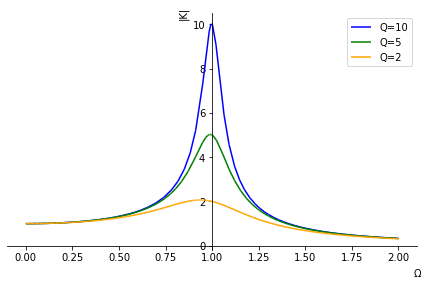

In [152]:
fig = plot(1/sp.sqrt((1-W**2)**2+W**2/100),
           1/sp.sqrt((1-W**2)**2+W**2/25),
           1/sp.sqrt((1-W**2)**2+W**2/4),
           (W,0,2),
           show=False)
fig[0].line_color='blue'
fig[1].line_color='green'
fig[2].line_color='orange'
fig[0].label='Q=10'
fig[1].label='Q=5'
fig[2].label='Q=2'
fig.axis_center = 1, 0
fig.ylabel = '|K|'
fig.xlabel = '$\Omega$'
fig.legend = True
fig.show()